# Data exploration

In [ ]:
import pandas as pd
dataset_path = "../dataset/RISCM/"
df = pd.read_csv(dataset_path+'captions.csv')
print(df.head())

  source split           image  \
0   NWPU  test  NWPU_31430.jpg   
1   NWPU  test  NWPU_31431.jpg   
2   NWPU  test  NWPU_31432.jpg   
3   NWPU  test  NWPU_31433.jpg   
4   NWPU  test  NWPU_31434.jpg   

                                           caption_1  \
0   A gray plane on the runway and the lawn beside .   
1  Three small planes parked in a line on the air...   
2  A plane parked in a line on the airport with s...   
3  A small plane and a big plane parked next to b...   
4       Two planes parked next to boarding bridges .   

                                           caption_2  \
0        A grey plane is on the runway by the lawn .   
1  There are four aircraft on the open ground, Th...   
2  A white plane was parked on the instruction li...   
3  A white plane and a gray plane parked at the b...   
4  Two aircraft were parked at the departure gates .   

                                           caption_3  \
0  There is an airplane on the runway with a larg...   
1  There 

Checked if there are any null or duplicated data

In [4]:
print(df.isnull().sum())

print(df.duplicated().sum())

source       0
split        0
image        0
caption_1    0
caption_2    0
caption_3    0
caption_4    0
caption_5    0
dtype: int64
0


Checked the distribution of caption lenghts. It was seen that the shortest description consists of 120 characters.

In [6]:
df['caption_length'] = df[['caption_1', 'caption_2', 'caption_3', 'caption_4', 'caption_5']].applymap(len).sum(axis=1)
print(df['caption_length'].describe())

count    44521.000000
mean       308.677388
std         65.261750
min        120.000000
25%        261.000000
50%        307.000000
75%        352.000000
max        638.000000
Name: caption_length, dtype: float64


C:\Users\USER\AppData\Local\Temp\ipykernel_21816\1418883394.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df['caption_length'] = df[['caption_1', 'caption_2', 'caption_3', 'caption_4', 'caption_5']].applymap(len).sum(axis=1)


Checked the duplicate captions. It was seen that same captions are used many times.

In [7]:
caption_counts = pd.concat([df['caption_1'], df['caption_2'], df['caption_3'], df['caption_4'], df['caption_5']])
print(caption_counts.value_counts().head(20))

many buildings and green trees are in a dense residential area .                                       592
The snow berg is consist of bare land and white snow .                                                 448
many pieces of farmlands are together .                                                                440
The entire image is dominated by grass .                                                               435
This is a dense forest .                                                                               423
many buildings are in an industrial area .                                                             298
The bare and green terrace is next to some trees .                                                     290
The meadow is dense but uneven .                                                                       288
The tennis court is on the grass next to some buildings and trees .                                    282
There are many buildings next to the 

Checked distributions of train, test, and validation splits. It was seen that it is split in 0.8:0.1:0.1 ratio.

In [10]:
print(df['split'].value_counts())

split
train    35614
test      4454
val       4453
Name: count, dtype: int64


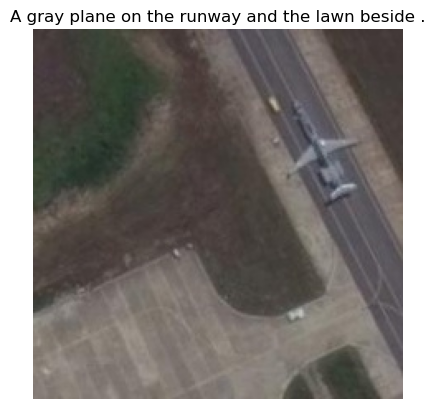

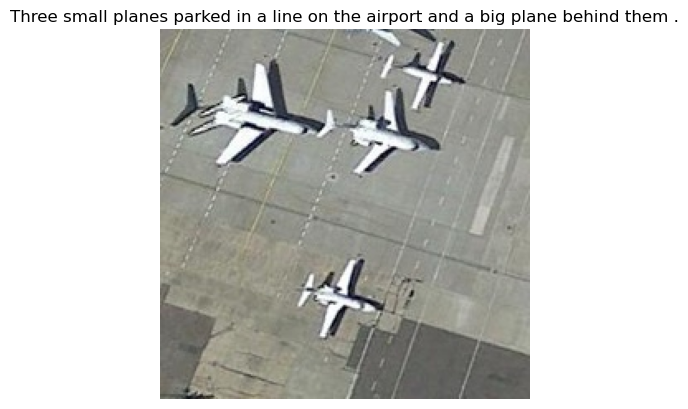

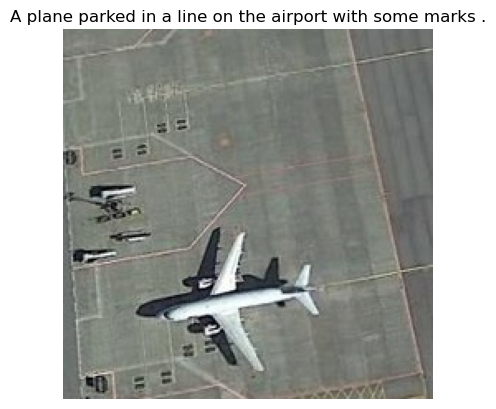

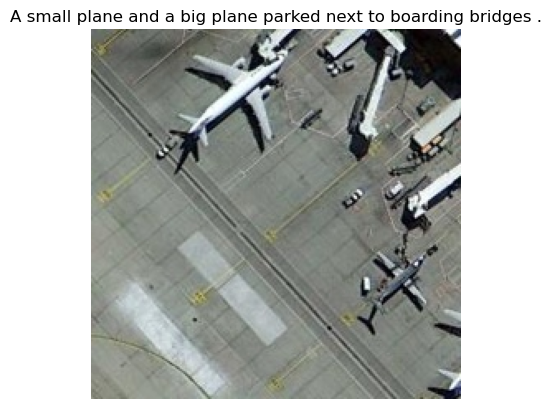

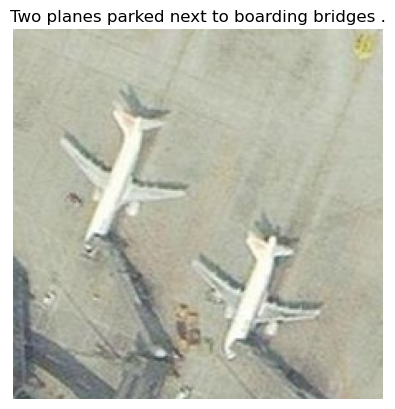

In [12]:
import matplotlib.pyplot as plt
from PIL import Image
import os

def plot_image_with_caption(image_path, caption):
    img = Image.open(image_path)
    plt.imshow(img)
    plt.title(caption)
    plt.axis('off')
    plt.show()

for i in range(5):
    img_path = os.path.join(dataset_path+"resized", df.iloc[i]['image'])
    caption = df.iloc[i]['caption_1']
    plot_image_with_caption(img_path, caption)